In [2]:
# import all libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
# basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.duplicated().sum()

np.int64(1)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

In [10]:
# How many rows and column in the dataset
print('The toysl rows ad column',df.shape)
print('Rows',df.shape[0])
print('column',df.shape[1])

The toysl rows ad column (1337, 7)
Rows 1337
column 7


In [11]:
# Description of the dataset
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


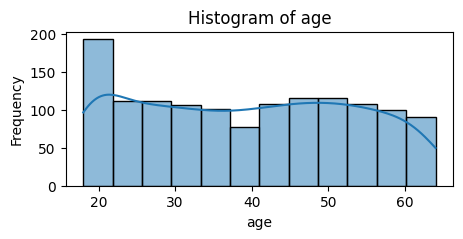

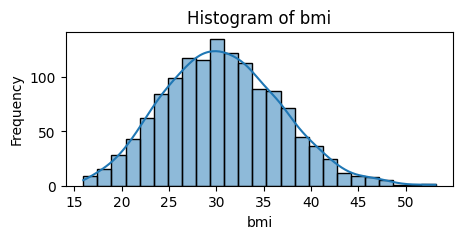

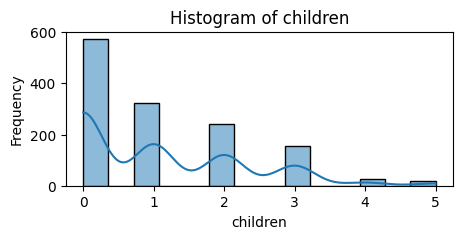

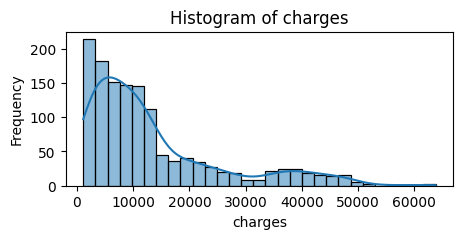

In [12]:
# Histogram of all columns
for col in df.select_dtypes(np.number):
  plt.figure(figsize=(5,2))
  sns.histplot(df[col], kde = True)
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

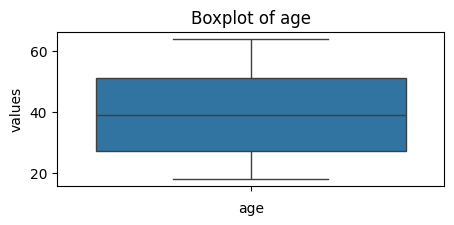

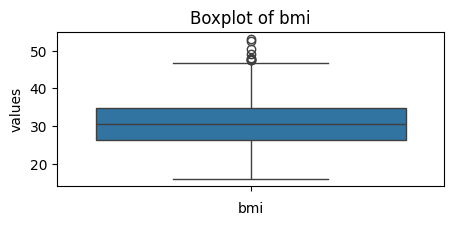

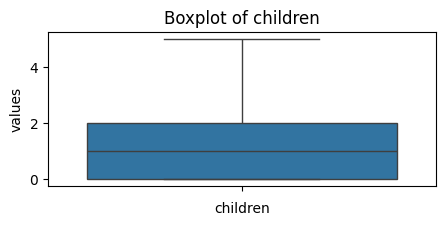

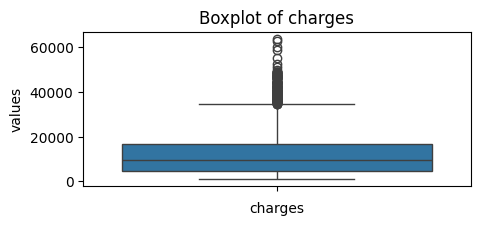

In [14]:
# boxplot for the columns to check the outlier
for col in df.select_dtypes(np.number):
  plt.figure(figsize=(5,2))
  sns.boxplot(df[col])
  plt.title(f'Boxplot of {col}')
  plt.xlabel(col)
  plt.ylabel('values')
  plt.show()

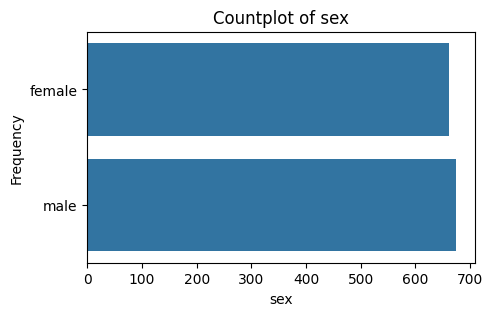

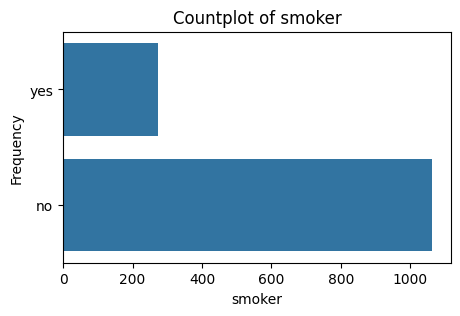

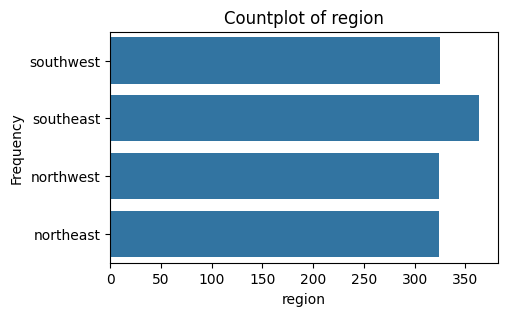

In [15]:
# Countplot
for col in df.select_dtypes(exclude= np.number):
  plt.figure(figsize=(5,3))
  sns.countplot(df[col])
  plt.title(f'Countplot of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

In [16]:
#lable encoding
# dealing with binary categorical values
df.loc[df['sex'] == 'male', 'sex'] = 1
df.loc[df['sex'] == 'female', 'sex'] = 0
df.loc[df['smoker']== 'yes', 'smoker'] = 1
df.loc[df['smoker']== 'no', 'smoker'] = 0

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [18]:
# one hot encoding
df = pd.get_dummies(df, columns=['region'])
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


In [19]:
# Relace False with 0 and true with 1
df = df.replace({False: 0, True: 1})
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


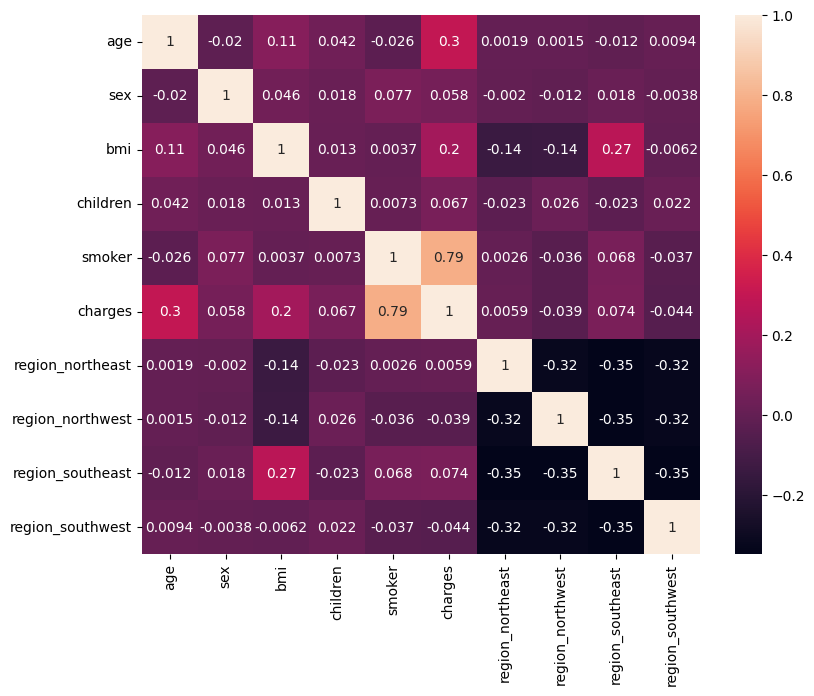

In [20]:
# Corrilation
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [21]:
# Train and test split
x = df[['smoker']]
y = df[['charges']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [22]:
# model selection and fitting the train value
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [23]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [24]:
# R2 score for model
from sklearn.metrics import r2_score
print('Training R2 score :',np.round(r2_score(y_train, y_train_pred)))
print('Testing R2 score :',np.round(r2_score(y_test, y_test_pred)))

Training R2 score : 1.0
Testing R2 score : 1.0


In [25]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

In [26]:
x = df[['age','bmi','smoker']]
y = df[['charges']]

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [29]:
from sklearn.metrics import r2_score
print('Training R2 score :',np.round(r2_score(y_train, y_train_pred)))
print('Testing R2 score :',np.round(r2_score(y_test, y_test_pred)))

Training R2 score : 1.0
Testing R2 score : 1.0


In [30]:
model.predict([[25,24,0]])

array([[2602.18919444]])